In [6]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
import io

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [7]:
from google.colab import files
uploaded = files.upload()

Saving BarisalFlood.csv to BarisalFlood.csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['BarisalFlood.csv']))

In [9]:
df.head(5)

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0,68,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9,63,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8,59,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140,71,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217,76,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [10]:
df.drop(columns='Station_Names',inplace=True)
df.drop(columns='Station_Number',inplace=True)
df.drop(columns='X_COR',inplace=True)
df.drop(columns='Y_COR',inplace=True)
df.drop(columns='LATITUDE',inplace=True)
df.drop(columns='LONGITUDE',inplace=True)
df.drop(columns='ALT',inplace=True)
df['Flood?'] = df['Flood?'].fillna(0)

In [11]:
df.head(5)

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
0,0,1949,1,29.4,12.3,0,68,0.453704,0.6,7.831915,1949.01,0.0
1,1,1949,2,33.9,15.2,9,63,0.659259,0.9,8.314894,1949.02,0.0
2,2,1949,3,36.7,20.2,8,59,1.085185,1.5,8.131915,1949.03,0.0
3,3,1949,4,33.9,23.9,140,71,1.772222,3.9,8.219149,1949.04,0.0
4,4,1949,5,35.6,25.0,217,76,1.703704,4.1,7.046809,1949.05,0.0


In [12]:
df.shape

(780, 12)

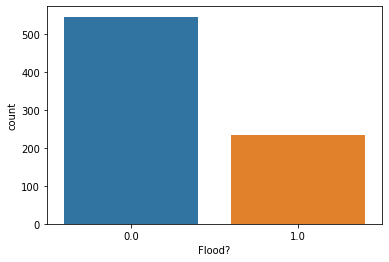

In [13]:
sns.countplot(df['Flood?'],label="Count")

Text(0.5, 1.05, 'Correlation')

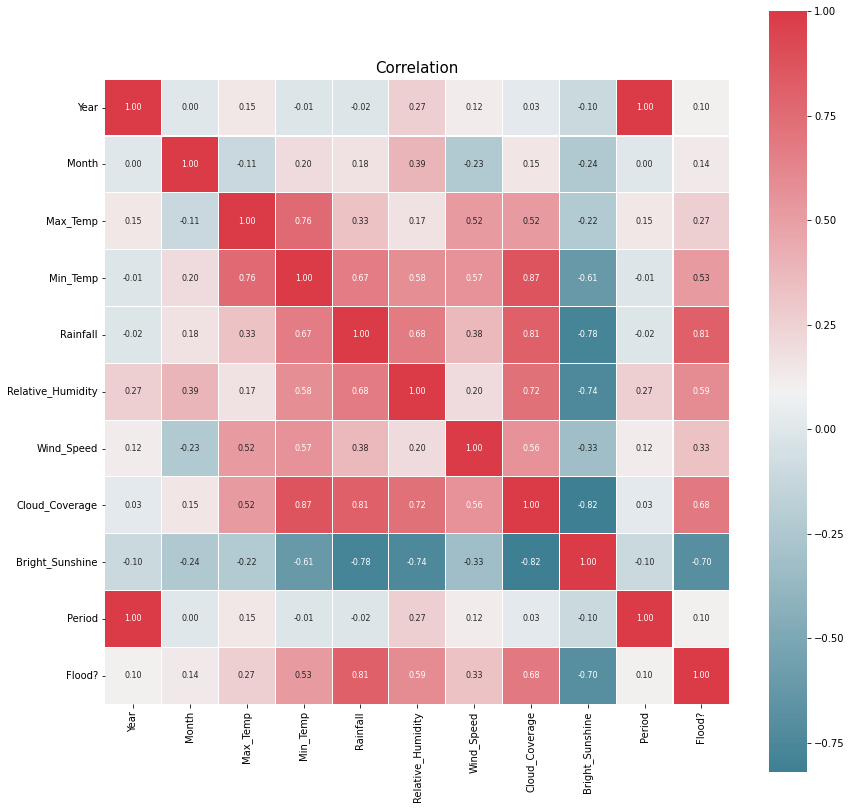

In [14]:
corr = df.iloc[:,1:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation', y=1.05, size=15)

In [15]:
train,test = train_test_split(df, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (546, 12)
Testing Data : (234, 12)


In [16]:
train_id = train['Sl']
test_id = test['Sl']

train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (546, 11)
Testing Data : (234, 11)


In [17]:
# Training Data
train_x = train_data.iloc[: , :-1]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[: , :-1]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (546, 10)
Testing Data : (234, 10)


In [18]:
train_data.head(5)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
24,1951,1,28.2,12.3,0,77,0.453704,0.6,7.831915,1951.01,0.0
635,2001,12,29.8,13.3,0,86,0.100000,0.8,7.600000,2001.12,0.0
622,2000,11,33.0,19.2,10,87,0.100000,1.1,8.700000,2000.11,0.0
334,1976,11,32.8,20.3,23,83,0.300000,2.2,7.900000,1976.11,0.0
363,1979,4,37.5,24.1,38,75,1.100000,2.2,9.200000,1979.04,0.0


In [19]:
test_data.head(5)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
595,1998,8,34.5,25.2,516,91,1.1,6.3,2.8,1998.08,1.0
587,1997,12,29.6,13.4,12,89,0.4,2.1,4.2,1997.12,0.0
543,1994,4,36.5,23.1,101,77,0.8,3.5,8.0,1994.04,0.0
644,2002,9,35.0,25.5,315,92,0.5,5.7,4.8,2002.09,1.0
487,1989,8,32.7,25.4,203,88,1.0,5.7,4.3,1989.08,0.0


In [20]:
# Training Data
train_y = train_data[['Flood?']]
train_y[train_y=='0'] = 0
train_y[train_y=='1'] = 1
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data[['Flood?']]
test_y[test_y=='0'] = 0
test_y[test_y=='1'] = 1
print("Testing Data :", test_y.shape)

Training Data : (546, 1)
Testing Data : (234, 1)


In [21]:
import warnings
warnings.filterwarnings("ignore")

X = tf1.placeholder(tf.float32, [None,10])
Y = tf1.placeholder(tf.float32, [None,1])

In [22]:
# weight
W = tf1.Variable(tf.random.normal([10,1], seed=0), name='weight')

# bias
b = tf1.Variable(tf.random.normal([1], seed=0), name='bias')

In [23]:
logits = tf.matmul(X,W) + b

In [24]:
hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)
# cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

In [25]:
train = tf1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [26]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [27]:
with tf1.Session() as sess:
    sess.run(tf1.global_variables_initializer())
    for step in range(1001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 0.764	Acc: 43.22%
Step:   100	Loss: 0.551	Acc: 65.38%
Step:   200	Loss: 0.454	Acc: 76.37%
Step:   300	Loss: 0.400	Acc: 83.33%
Step:   400	Loss: 0.367	Acc: 85.53%
Step:   500	Loss: 0.345	Acc: 86.26%
Step:   600	Loss: 0.328	Acc: 86.45%
Step:   700	Loss: 0.316	Acc: 86.63%
Step:   800	Loss: 0.306	Acc: 86.26%
Step:   900	Loss: 0.299	Acc: 86.45%
Step:  1000	Loss: 0.292	Acc: 86.63%
Model Prediction = 0.86630034
Test Prediction = 0.8504273


In [28]:
def ann_slp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf1.placeholder(tf1.float32, [None,10])
    Y = tf1.placeholder(tf1.float32, [None, 1])

    W = tf1.Variable(tf1.random_normal([10,1], seed=0), name='weight')
    b = tf1.Variable(tf1.random_normal([1], seed=0), name='bias')

    logits = tf1.matmul(X,W) + b
    hypothesis = tf1.nn.sigmoid(logits)
    
    cost_i = tf1.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf1.reduce_mean(cost_i)

    train = tf1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

    prediction = tf1.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf1.equal(prediction, Y)
    accuracy = tf1.reduce_mean(tf1.cast(correct_prediction, dtype=tf1.float32))

    print("\n============Processing============")
    with tf1.Session() as sess:
        sess.run(tf1.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_slp_train_acc, ann_slp_test_acc = ann_slp()

===========Data Summary===========
Training Data : (546, 10)
Testing Data : (234, 10)

============Processing============
Step:     0	Loss: 0.764	Acc: 43.22%
Step:  1000	Loss: 0.292	Acc: 86.63%
Step:  2000	Loss: 0.256	Acc: 87.55%
Step:  3000	Loss: 0.238	Acc: 89.01%
Step:  4000	Loss: 0.224	Acc: 90.11%
Step:  5000	Loss: 0.214	Acc: 90.48%
Step:  6000	Loss: 0.204	Acc: 91.03%
Step:  7000	Loss: 0.196	Acc: 91.39%
Step:  8000	Loss: 0.190	Acc: 91.76%
Step:  9000	Loss: 0.184	Acc: 92.67%
Step: 10000	Loss: 0.178	Acc: 93.41%

============Results============
Model Prediction = 0.93406594
Test Prediction = 0.9145299


In [34]:
def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf1.placeholder(tf1.float32, [None,10])
    Y = tf1.placeholder(tf1.float32, [None, 1])

    # input
    W1 = tf1.Variable(tf1.random_normal([10,20], seed=0), name='weight1')
    b1 = tf1.Variable(tf1.random_normal([20], seed=0), name='bias1')
    layer1 = tf1.nn.sigmoid(tf1.matmul(X,W1) + b1)

    # hidden1
    W2 = tf1.Variable(tf1.random_normal([20,20], seed=0), name='weight2')
    b2 = tf1.Variable(tf1.random_normal([20], seed=0), name='bias2')
    layer2 = tf1.nn.sigmoid(tf1.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf1.Variable(tf1.random_normal([20,60], seed=0), name='weight3')
    b3 = tf1.Variable(tf1.random_normal([60], seed=0), name='bias3')
    layer3 = tf1.nn.sigmoid(tf1.matmul(layer2,W3) + b3)

    # output
    W4 = tf1.Variable(tf1.random_normal([60,1], seed=0), name='weight4')
    b4 = tf1.Variable(tf1.random_normal([1], seed=0), name='bias4')
    logits = tf1.matmul(layer3,W4) + b4
    hypothesis = tf1.nn.sigmoid(logits)

    cost_i = tf1.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf1.reduce_mean(cost_i)

    train = tf1.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf1.cast(hypothesis > 0.5, dtype=tf1.float32)
    correct_prediction = tf1.equal(prediction, Y)
    accuracy = tf1.reduce_mean(tf1.cast(correct_prediction, dtype=tf1.float32))

    print("\n============Processing============")
    with tf1.Session() as sess:
        sess.run(tf1.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_mlp_train_acc, ann_mlp_test_acc = ann_mlp()

===========Data Summary===========
Training Data : (546, 10)
Testing Data : (234, 10)

============Processing============
Step:     0	Loss: 3.457	Acc: 29.67%
Step:  1000	Loss: 0.507	Acc: 70.88%
Step:  2000	Loss: 0.483	Acc: 69.96%
Step:  3000	Loss: 0.459	Acc: 72.34%
Step:  4000	Loss: 0.436	Acc: 76.56%
Step:  5000	Loss: 0.414	Acc: 80.22%
Step:  6000	Loss: 0.394	Acc: 83.15%
Step:  7000	Loss: 0.377	Acc: 84.43%
Step:  8000	Loss: 0.361	Acc: 85.53%
Step:  9000	Loss: 0.348	Acc: 86.08%
Step: 10000	Loss: 0.337	Acc: 86.26%

============Results============
Model Prediction = 0.86263734
Test Prediction = 0.85897434


In [36]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = test_predict.astype(int)
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub.head(10)

,id,Predict_Type,Origin_Type,Correct
595,595,1,1.0,True
587,587,0,0.0,True
543,543,0,0.0,True
644,644,1,1.0,True
487,487,1,0.0,False
211,211,1,1.0,True
388,388,0,1.0,False
527,527,0,0.0,True
244,244,0,0.0,True
582,582,1,1.0,True
